In [1]:
%pylab nbagg
import torch
import numpy as np
from lib.utils import *
from numpy import array as ar
from copy import deepcopy as dcp
from matplotlib import rc
import matplotlib as mpl
from lib.Simulator.connectivity_paths import connectivity_source_file
from lib.Simulator.Wrapper import connectivity
rc('text',usetex = True)
mpl.rcParams['font.size'] = 10
torch.set_printoptions(sci_mode=True)
sc = connectivity.Connectivity.from_file(connectivity_source_file)
SC_scaled = sc.weights* ((np.ones((68,68)) - np.eye(68)))
SC_scaled /= np.max(SC_scaled)

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = [f'./Data/homogeneous_2d_sweep_denoise',f'./Data/heterogeneous_2d_sweep_denoise',f'./Data/homogeneous_2d_sweep_noise',f'./Data/heterogeneous_2d_sweep_noise']

In [3]:
par_vals = [np.load(f'{p}_global_par.npy',allow_pickle = True) for p in path]
psd = torch.cat([torch.load(f'{p}_psd.pt').view(1,101,68,-1) for p in path], dim = 0)

<IPython.core.display.Javascript object>


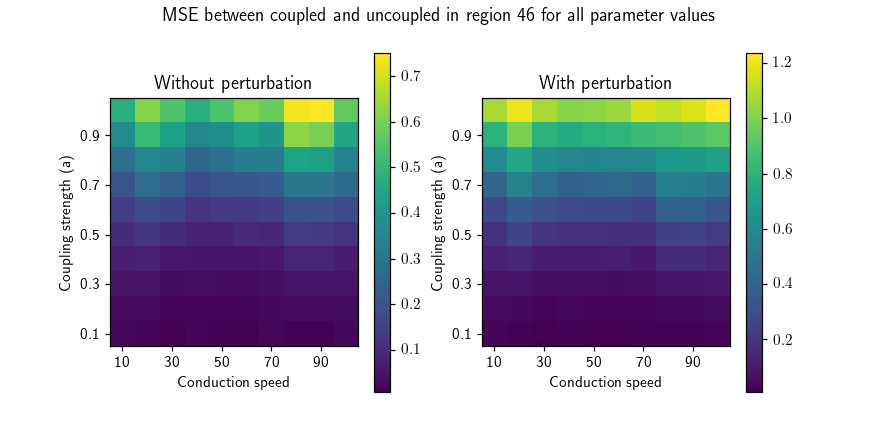

<IPython.core.display.Javascript object>


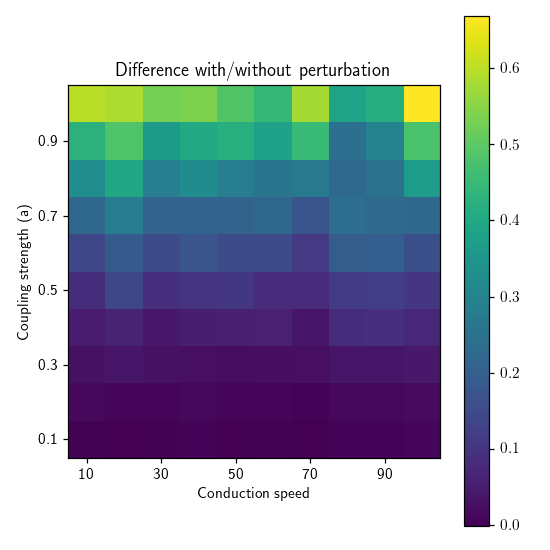

In [30]:
mse = torch.transpose(((psd[:,1:,:,4:100] - psd[:,0,:,4:100].view(4,1,68,96))**2).mean(dim = -1),1,2).detach().numpy() * 1e7
f = figure(figsize=(8,4))
ax = subplot(121)
imshow(mse[2,46,:].reshape((10,10)))
colorbar()
ax.invert_yaxis()
ax.set_yticks([i for i in range(0,10,2)])
ax.set_yticklabels([f'{str(round(0.1+0.2*i,2))[:6]}' for i in range(5)])
ax.set_xticks([i for i in range(0,10,2)])
ax.set_xticklabels([f'{str(round(10+20*i,2))[:6]}' for i in range(5)])
xlabel('Conduction speed')
ylabel("Coupling strength (a)")
title("Without perturbation")
ax = subplot(122)
imshow(mse[3,46,:].reshape((10,10)))
colorbar()
ax.invert_yaxis()
ax.set_yticks([i for i in range(0,10,2)])
ax.set_yticklabels([f'{str(round(0.1+0.2*i,2))[:6]}' for i in range(5)])
ax.set_xticks([i for i in range(0,10,2)])
ax.set_xticklabels([f'{str(round(10+20*i,2))[:6]}' for i in range(5)])
xlabel('Conduction speed')
ylabel("Coupling strength (a)")
title("With perturbation")
suptitle("MSE between coupled and uncoupled in region 46 for all parameter values")
savefig(f'Figures/MSE_46_sweep_noise.pdf', format = "pdf")
f = figure(figsize=(5,5))
ax = subplot(111)
imshow(mse[3,46,:].reshape((10,10))-mse[2,46,:].reshape((10,10)))
ax.set_yticks([i for i in range(0,10,2)])
ax.set_yticklabels([f'{str(round(0.1+0.2*i,2))[:6]}' for i in range(5)])
ax.set_xticks([i for i in range(0,10,2)])
ax.set_xticklabels([f'{str(round(10+20*i,2))[:6]}' for i in range(5)])
xlabel('Conduction speed')
ylabel("Coupling strength (a)")
title("Difference with/without perturbation")
colorbar()
ax.invert_yaxis()

tight_layout()
savefig(f'Figures/MSE_difference_46_sweep_noise.pdf', format = "pdf")

In [9]:
mse = torch.transpose(((psd[:,1:,:,4:100] - psd[:,0,:,4:100].view(4,1,68,96))**2).mean(dim = -1),1,2).detach().numpy()* 1e7
mse = np.concatenate([mse,np.zeros((4,1,100))],axis=1)
print(mse.shape)

(4, 69, 100)


<IPython.core.display.Javascript object>


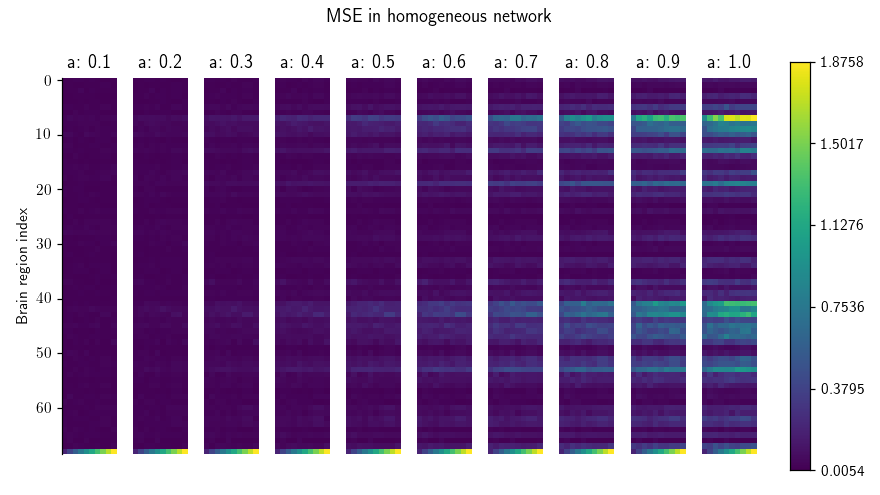

<IPython.core.display.Javascript object>


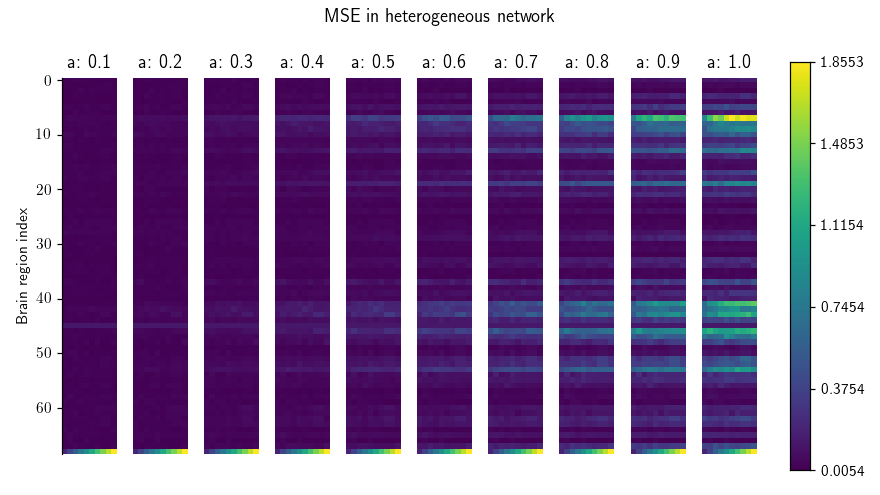

-0.10664425149485357
0.6679193763047204


<IPython.core.display.Javascript object>


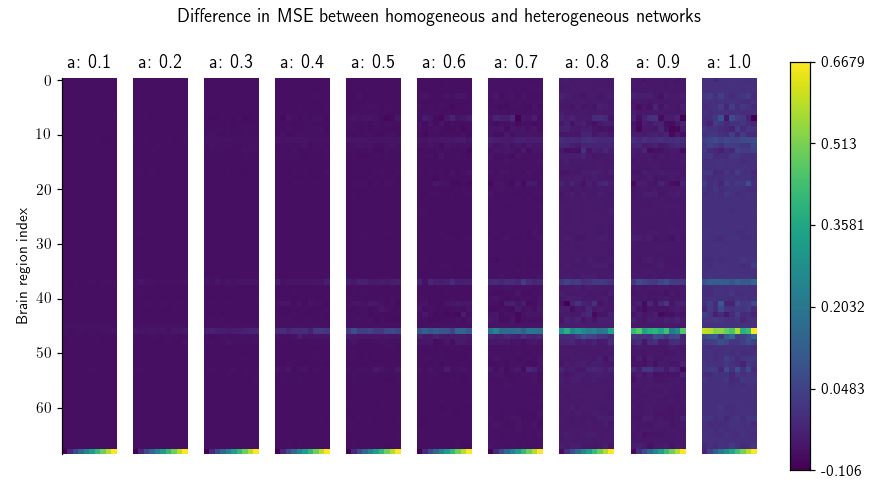

In [27]:
fisz = (8,4.5)
figure(figsize=fisz)
counter = 1
lower_b = np.amin(mse[2])
upper_b = np.amax(mse[2])
for i in range(0,100,10):
    ax = subplot(1,11,counter)
    counter+=1
    mse[2,-1,i:i+10] = lower_b + np.arange(11)[1:]*(upper_b-lower_b)/10
    ax.imshow(mse[2,:,i:i+10])
    title(f"a: {round(par_vals[2][i][0]*1000,2)}")
    if i!=0:
        ax.axis('off')
        continue
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylabel("Brain region index")
ax = subplot(1,11,counter)
ax.imshow([[upper_b-((upper_b-lower_b)/1000*i)for j in range(50)] for i in range(1000)])    
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.set_yticks([i for i in range(0,1200,200)])
ax.set_yticklabels([f'{str(np.round(upper_b-((upper_b-lower_b)/5*i),4))[:6]}' for i in range(6)])
counter=1 
suptitle("MSE in homogeneous network")
tight_layout()
savefig(f'Figures/MSE_sweep_noise_homogeneous.pdf', format = "pdf")
lower_b = np.amin(mse[3,:68,:])
mse[3,45,:] = mse[3].mean()
upper_b = np.amax(mse[3])
figure(figsize=fisz)
for i in range(0,100,10):
    ax = subplot(1,11,counter)
    counter+=1
    mse[3,-1,i:i+10] = lower_b + np.arange(11)[1:]*(upper_b-lower_b)/10
    imshow(mse[3,:,i:i+10])
    title(f"a: {round(par_vals[2][i][0]*1000,2)}")
    if i!=0:
        ax.axis('off')
        continue
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylabel("Brain region index")
ax = subplot(1,11,counter)
ax.imshow([[upper_b-((upper_b-lower_b)/1000*i)for j in range(50)] for i in range(1000)])    
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.set_yticks([i for i in range(0,1200,200)])
ax.set_yticklabels([f'{str(np.round(upper_b-((upper_b-lower_b)/5*i),4))[:6]}' for i in range(6)])
counter=1
suptitle("MSE in heterogeneous network")
tight_layout()
savefig(f'Figures/MSE_sweep_noise_heterogeneous.pdf', format = "pdf")
diff = mse[3]-mse[2]
diff[45,:] = diff.mean()
lower_b = np.amin(diff[:-2])
upper_b = np.amax(diff[:-2])
figure(figsize=fisz)    
for i in range(0,100,10):
    ax = subplot(1,11,counter)
    counter+=1
    diff[-1,i:i+10] = lower_b + np.arange(11)[1:]*(upper_b-lower_b)/10
    ax.imshow(diff[:,i:i+10])
    title(f"a: {round(par_vals[2][i][0]*1000,2)}")
    if i!=0:
        ax.axis('off')
        continue
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylabel("Brain region index")
ax = subplot(1,11,counter)
ax.imshow([[upper_b-((upper_b-lower_b)/1000*i)for j in range(50)] for i in range(1000)])   
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.set_yticks([i for i in range(0,1200,200)])
ax.set_yticklabels([f'{str(np.round(upper_b-((upper_b-lower_b)/5*i),4))[:6]}' for i in range(6)])
counter+=1 
suptitle("Difference in MSE between homogeneous and heterogeneous networks")
tight_layout()
savefig(f'Figures/MSE_sweep_noise_difference.pdf', format = "pdf")

<IPython.core.display.Javascript object>


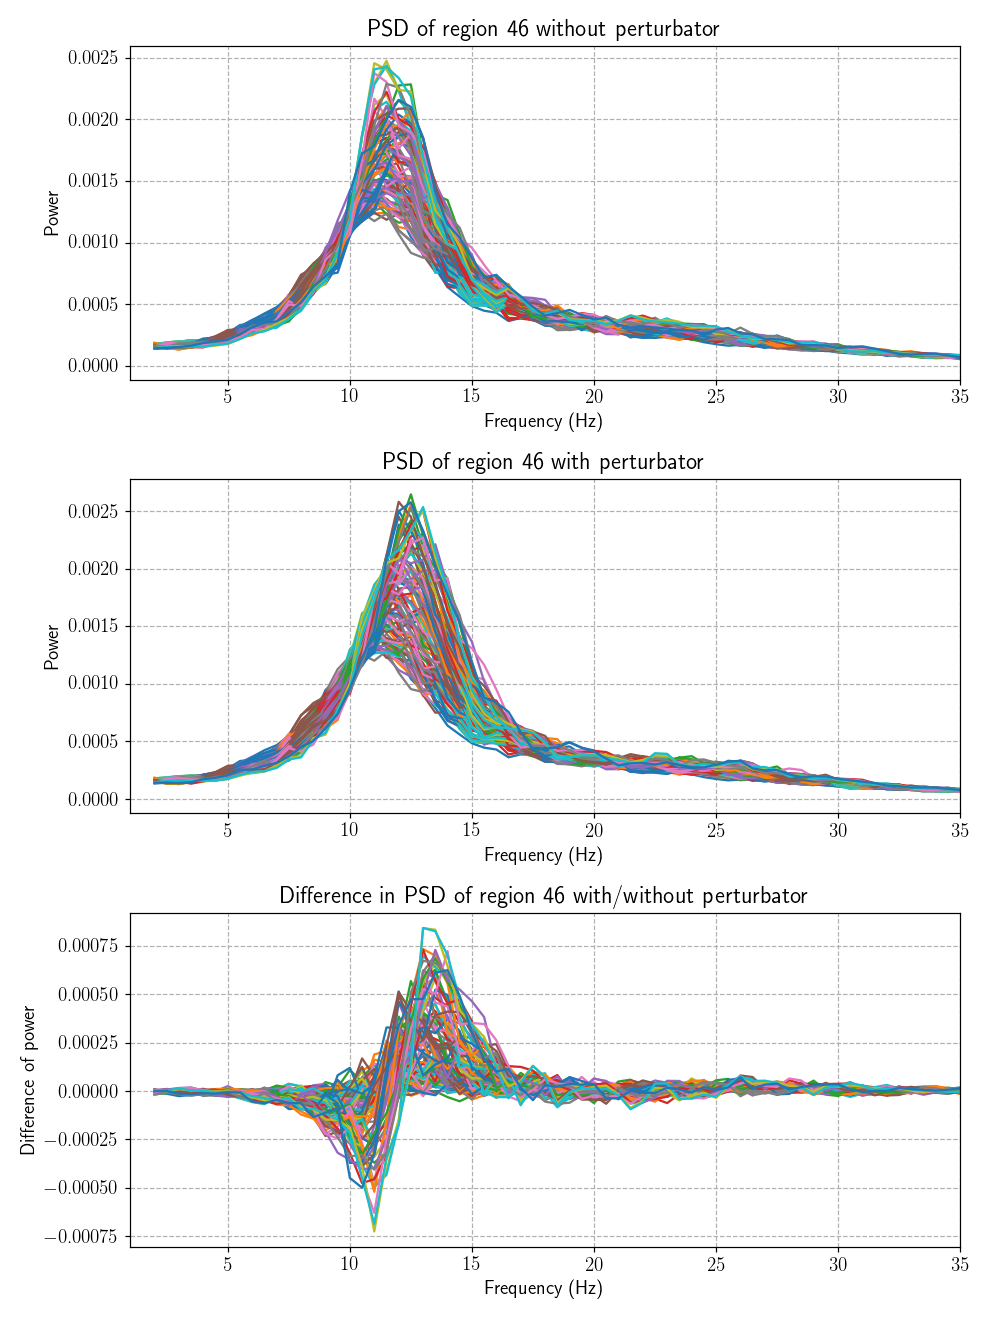

In [32]:
mpl.rcParams['font.size'] = 12.5
freqs = [0.5*i for i in range(4,100)]
figure(figsize=(9,12))
subplot(3,1,1)
for i in range(101):
    plot(freqs,psd[2][i,46,4:100],label = f'Uncoupled',linestyle = '-')
xlim([1,35])
grid(linestyle = '--')
title("PSD of region 46 without perturbator")
xlabel("Frequency (Hz)")
ylabel("Power")
subplot(3,1,2)
for i in range(101):
    plot(freqs,psd[3][i,46,4:100],label = f'Uncoupled',linestyle = '-')
xlim([1,35])
grid(linestyle = '--')
title("PSD of region 46 with perturbator")
xlabel("Frequency (Hz)")
ylabel("Power")
subplot(3,1,3)
for i in range(101):
    plot(freqs,(psd[3][i,46,4:100]-psd[2][i,46,4:100]),label = f'Uncoupled',linestyle = '-')
xlim([1,35])
grid(linestyle = '--')
title("Difference in PSD of region 46 with/without perturbator")
xlabel("Frequency (Hz)")
ylabel("Difference of power")
tight_layout()
show()
savefig(f'Figures/PSD46_sweep_noise.pdf', format = "pdf")

In [11]:
mpl.rcParams['font.size'] = 12.5
colormap = cm.gist_ncar


freqs = [0.5*i for i in range(4,100)]
figure(figsize=(9,12))
subplot(3,1,1)
gca().set_prop_cycle(plt.cycler('color',plt.cm.jet(np.linspace(0,1,11))))
plot(freqs,psd[2][0,46,4:100],label = f'Uncoupled',linestyle = '--',linewidth = 2)
for i in range(1,101,10):
    plot(freqs, psd[2][i,46,4:100],linestyle = '-')
xlim([1,35])
gca().set_prop_cycle(plt.cycler('color',plt.cm.jet(np.linspace(0,1,11))))
grid(linestyle = '--')
title("PSD of region 46 without perturbator")
xlabel("Frequency (Hz)")
ylabel("Power")
legend()
subplot(3,1,2)
plot(freqs,psd[3][0,46,4:100],label = f'Uncoupled',linestyle = '--',linewidth = 2)
for i in range(1,101,10):
    plot(freqs,psd[3][i,46,4:100],linestyle = '-')
xlim([1,35])

grid(linestyle = '--')
title("PSD of region 46 with perturbator")
xlabel("Frequency (Hz)")
ylabel("Power")
legend()
ax = subplot(3,1,3)
plot(freqs,(psd[3][0,46,4:100]-psd[2][0,46,4:100]),label = f'Uncoupled',linestyle = '--',linewidth = 2)
for i in range(1,101,10):
    plot(freqs,(psd[3][i,46,4:100]-psd[2][i,46,4:100]),linestyle = '-')
xlim([1,35])
gca().set_prop_cycle(plt.cycler('color',plt.cm.jet(np.linspace(0,1,11))))
grid(linestyle = '--')
title("Difference in PSD of region 46 with/without perturbator")
xlabel("Frequency (Hz)")
ylabel("Difference of power")
legend()
tight_layout()
show()
savefig(f'Figures/PSD46_sweep_noise_coupling_strength_only.pdf', format = "pdf")

<IPython.core.display.Javascript object>

In [ ]:
timeseries = np.load(f'{path[0]}_ts.npy')
num_sims = timeseries.shape[0]
connectome = np.zeros((num_sims,68,68))
for i in range(num_sims):
    connectome[i] =  np.corrcoef(timeseries[i])*(np.ones((68,68)) - np.eye(68))
print(connectome.shape)
conn_titles = ['Uncoupled']
for i in range(len(par_vals)):
    conn_titles.append(par_vals[i][2])
figure(figsize=(17,num_sims))
for i in range(num_sims):
    subplot(int(num_sims/4)+1,4,i+1)
    imshow(abs(connectome[i]))
    colorbar()
    title(conn_titles[i])
subplot(int(num_sims/4)+1,4,i+2)
imshow(SC_scaled)
colorbar()
title('SC')
tight_layout()

In [ ]:
eigen_dec_connectome = []
for c in connectome:
    val,vect = np.linalg.eig(c)
    val[3:] *= 0
    lambda_diag = np.diag(val)
    reconstructed_conn = vect @ lambda_diag @ vect.T
    eigen_dec_connectome.append(reconstructed_conn*(np.ones((68,68)) - np.eye(68)))
figure(figsize=(17,num_sims))
for i in range(num_sims):
    subplot(int(num_sims/4)+1,4,i+1)
    #imshow(eigen_dec_connectome[i])
    imshow(abs(eigen_dec_connectome[i]))
    colorbar()
    title(conn_titles[i])
subplot(int(num_sims/4)+1,4,i+2)
imshow(SC_scaled)
colorbar()
title('SC')
tight_layout()

In [ ]:
ts_show = True
plot_ts = [0,1,-1]
if ts_show:
    t = [5e-4*j for j in range(4000,5000)]
    figure(figsize=(16,15))
    for i in range(3):
        subplot(3,1,i+1)
        for j in range(68):
            plot(t,timeseries[plot_ts[i], j,4000:5000])
        title(f"Simulation: {plot_ts[i]}")
    
        grid(linestyle = '--')
    tight_layout()
    show()